In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.utils import np_utils

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import scipy.stats as stats
from sklearn import preprocessing, model_selection

## Load data & process data

In [65]:
data = pd.read_csv('data/new_combined_data.csv', header=None)

# Load columns
file_path = 'data/col_with_hands.txt'
columns = pd.read_csv(file_path, header=None)

# Add columns to df
columns = columns.values
columns = [item for sublist in columns for item in sublist]
data.columns = columns

In [66]:
data['label'].value_counts()

four     5561
seven    5264
six      5237
five     5073
ten      4815
eight    4799
nine     4630
zero     4595
three    4543
one      4199
two      4185
Name: label, dtype: int64

## Balance Data

In [67]:
labels = data['label'].value_counts().index
labels

Index(['four', 'seven', 'six', 'five', 'ten', 'eight', 'nine', 'zero', 'three',
       'one', 'two'],
      dtype='object')

In [68]:
four = data[data['label'] == 'four'].head(4185).copy()
seven = data[data['label'] == 'seven'].head(4185).copy()
six = data[data['label'] == 'six'].head(4185).copy()
five = data[data['label'] == 'five'].head(4185).copy()
ten = data[data['label'] == 'ten'].head(4185).copy()
eight = data[data['label'] == 'eight'].head(4185).copy()
nine = data[data['label'] == 'nine'].head(4185).copy()
zero = data[data['label'] == 'zero'].head(4185).copy()
three = data[data['label'] == 'three'].head(4185).copy()
one = data[data['label'] == 'one'].head(4185).copy()
two = data[data['label'] == 'two'].copy()

In [69]:
balanced_data = pd.DataFrame()
balanced_data = pd.concat([one, ten, seven, six, five, three, zero, four, nine, two, eight])
balanced_data.shape

(46035, 141)

In [70]:
balanced_data['label'].value_counts()

one      4185
ten      4185
seven    4185
six      4185
five     4185
three    4185
zero     4185
four     4185
nine     4185
two      4185
eight    4185
Name: label, dtype: int64

In [71]:
# Use for no_scaling tests
dataset = balanced_data.values
X = dataset[:,0:140].astype(float)
y = dataset[:,140]

## Normalise data

In [29]:
X = balanced_data.iloc[: ,:140]
y = balanced_data['label']

In [30]:
# normalise data
norm_scaler = MinMaxScaler()
norm_data = norm_scaler.fit_transform(X)
# re-construct dataframe with the label
norm_data = pd.DataFrame(data = norm_data)
norm_data['label'] = y.values
norm_data.columns = columns

In [31]:
dataset = norm_data.values
X = dataset[:,0:140].astype(float)
y = dataset[:,140]

## Standardise data

In [50]:
X = balanced_data.iloc[: ,:140]
y = balanced_data['label']

In [51]:
# standardise data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# re-construct dataframe with the label
scaled_data = pd.DataFrame(data = X)
scaled_data['label'] = y.values
scaled_data.columns = columns

In [52]:
dataset = scaled_data.values
X = dataset[:,0:140].astype(float)
y = dataset[:,140]

## Encode

In [72]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
encoded_y = np_utils.to_categorical(encoded_Y)

In [73]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, encoded_y, test_size = 0.2, random_state = 0)

In [74]:
INPUT_DIM = 140  # number of features
OUTPUT_DIM = 11  # number of classes

model = Sequential()
model.add(Dense(8, input_dim = INPUT_DIM , activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(OUTPUT_DIM, activation = 'softmax'))

In [75]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [76]:
history = model.fit(train_x, train_y, epochs = 10, validation_data=(test_x, test_y), batch_size = 2)

Epoch 1/10
18414/18414 [==============================] - 20s 1ms/step - loss: 1.2975 - accuracy: 0.4943 - val_loss: 0.6515 - val_accuracy: 0.7718
Epoch 2/10
18414/18414 [==============================] - 19s 1ms/step - loss: 0.5114 - accuracy: 0.8582 - val_loss: 0.3011 - val_accuracy: 0.9410
Epoch 3/10
18414/18414 [==============================] - 19s 1ms/step - loss: 0.3696 - accuracy: 0.9091 - val_loss: 0.2592 - val_accuracy: 0.9472
Epoch 4/10
18414/18414 [==============================] - 19s 1ms/step - loss: 0.3042 - accuracy: 0.9314 - val_loss: 0.2502 - val_accuracy: 0.9503
Epoch 5/10
18414/18414 [==============================] - 20s 1ms/step - loss: 0.2676 - accuracy: 0.9417 - val_loss: 0.2254 - val_accuracy: 0.9538
Epoch 6/10
18414/18414 [==============================] - 19s 1ms/step - loss: 0.2423 - accuracy: 0.9468 - val_loss: 0.2782 - val_accuracy: 0.9215
Epoch 7/10
18414/18414 [==============================] - 20s 1ms/step - loss: 0.2377 - accuracy: 0.9459 - val_loss: 0

In [58]:
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

288/288 [==============================] - 0s 763us/step - loss: 0.0420 - accuracy: 0.9907

accuracy: 99.07%


In [77]:
model.save('saved_models/no_scaling')

INFO:tensorflow:Assets written to: saved_models/no_scaling\assets


## No Scaling Graphs

In [78]:
def plot_learning_curve(history, epochs):
    # training and validation values
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

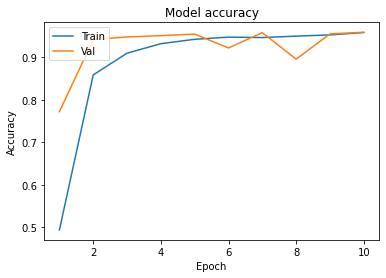

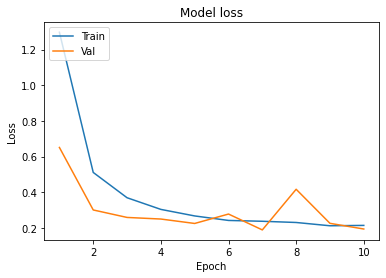

In [79]:
plot_learning_curve(history, 10)

In [80]:
rounded_labels = np.argmax(test_y, axis = 1)

In [81]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_x)

max_y_pred = []
for item in y_pred:
    max_y_pred.append(np.argmax(item))

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

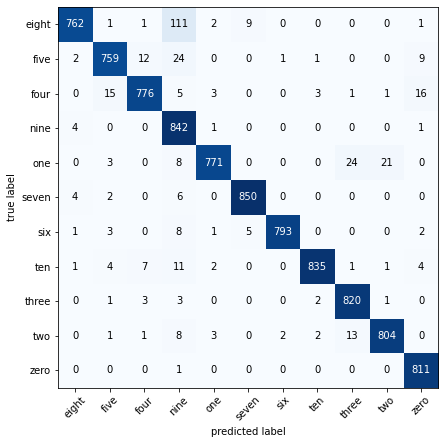

In [82]:
mat = confusion_matrix(rounded_labels, max_y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=encoder.classes_, show_normed=False, figsize=(7, 7))

## Normalisation Graphs

In [112]:
def plot_learning_curve(history, epochs):
    # training and validation values
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

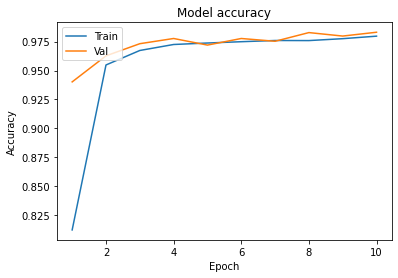

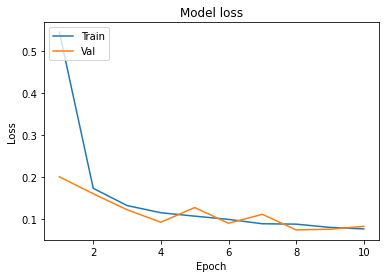

In [113]:
plot_learning_curve(history, 10)

In [114]:
rounded_labels = np.argmax(test_y, axis = 1)

In [115]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_x)

max_y_pred = []
for item in y_pred:
    max_y_pred.append(np.argmax(item))

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

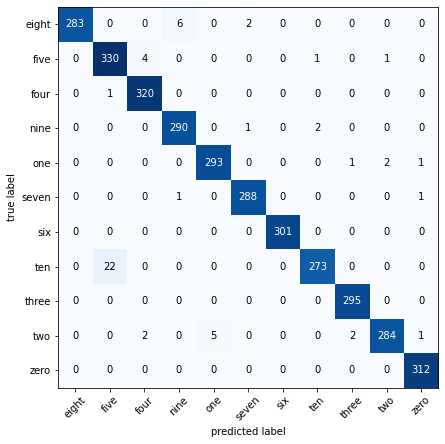

In [117]:
mat = confusion_matrix(rounded_labels, max_y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=encoder.classes_, show_normed=False, figsize=(7, 7))

## Standardisation Graphs

In [158]:
def plot_learning_curve(history, epochs):
    # training and validation values
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    # training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

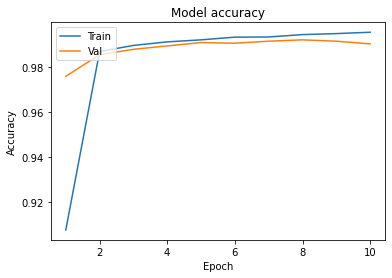

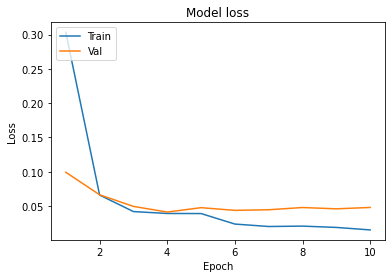

In [159]:
plot_learning_curve(history, 10)

In [160]:
rounded_labels = np.argmax(test_y, axis = 1)

In [161]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_x)

max_y_pred = []
for item in y_pred:
    max_y_pred.append(np.argmax(item))

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

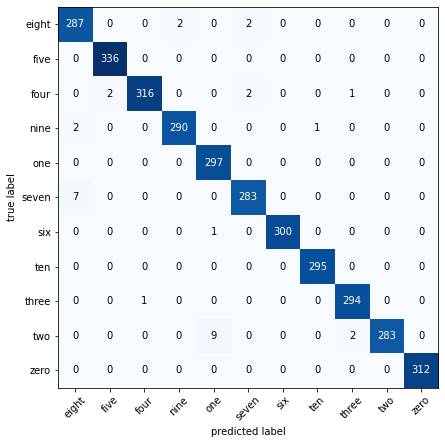

In [162]:
mat = confusion_matrix(rounded_labels, max_y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=encoder.classes_, show_normed=False, figsize=(7, 7))

In [83]:
encoder.classes_

array(['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'ten',
       'three', 'two', 'zero'], dtype=object)